<a href="https://colab.research.google.com/github/thaisflopes/demanda_viagens_bicicleta_BIXI_Montreal/blob/main/tcc_parte_4_analise_das_previsoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Código do trabalho de conclusão de curso
### Parte 4 - Análise das previsões

Código desenvolvido para o trabalho de conclusão *Comparando métodos de aprendizado de máquina para previsão da demanda de viagens de bicicletas da BIXI Montreal e análise do efeito da pandemia de COVID-19 na demanda de 2020*, elaborado por Thaís Lopes (https://github.com/thaisflopes) em novembro de 2021.

Link para acessar o trabalho completo: https://repositorio.uniceub.br/jspui/handle/prefix/15956
  

In [ ]:
#Importando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
!pip install plotly
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import seaborn as sns

In [ ]:
comparativo_2020 = pd.read_csv('comparativo_2020.csv')
comparativo_2020.head()

,Unnamed: 0,qtd_viagens,n_semana,previsao_A,previsao_B,previsao_C,dif_A,dif_B,dif_C
0,0,2,0,20315.92,1.664203e+06,29941.92,-20313.92,-1.664201e+06,-29939.92
1,1,3,0,20315.92,1.664203e+06,29941.92,-20312.92,-1.664200e+06,-29938.92
2,2,3,0,20315.92,1.664203e+06,29941.92,-20312.92,-1.664200e+06,-29938.92
3,3,3,0,20315.92,1.664203e+06,29941.92,-20312.92,-1.664200e+06,-29938.92
4,4,1,0,20315.92,1.664203e+06,29941.92,-20314.92,-1.664202e+06,-29940.92


In [ ]:
comparativo_2020 = comparativo_2020.drop(labels=['Unnamed: 0', 'qtd_viagens', 'dif_A', 'dif_B', 'dif_C'], axis = 1)
comparativo_2020.head()

,n_semana,previsao_A,previsao_B,previsao_C
0,0,20315.92,1.664203e+06,29941.92
1,0,20315.92,1.664203e+06,29941.92
2,0,20315.92,1.664203e+06,29941.92
3,0,20315.92,1.664203e+06,29941.92
4,0,20315.92,1.664203e+06,29941.92


In [ ]:
#Retirando linhas duplicadas
comparativo_2020 = comparativo_2020.drop_duplicates()
comparativo_2020.head()

,n_semana,previsao_A,previsao_B,previsao_C
0,0,20315.92,1.664203e+06,29941.92
11428,1,44817.76,1.664203e+06,109498.47
32407,2,67499.34,1.664203e+06,139831.67
64002,3,72465.69,1.649678e+06,175619.31
91345,4,100362.30,1.649678e+06,213007.15


In [ ]:
#Calculando a quantidade total de viagens por semana - 2020
dados_2020 = pd.read_csv('dados_2020.csv')
viagens_por_semana_2020 = dados_2020.groupby(['n_semana'])['qtd_viagens'].sum()
viagens_por_semana_2020 = pd.DataFrame(viagens_por_semana_2020)
viagens_por_semana_2020 = viagens_por_semana_2020.reset_index()
viagens_por_semana_2020.head()

,n_semana,qtd_viagens
0,0,15944
1,1,32475
2,2,53894
3,3,45049
4,4,74550


In [ ]:
comparativo_2020 = pd.merge(viagens_por_semana_2020, comparativo_2020, how='inner', on='n_semana')
comparativo_2020.head()

,n_semana,qtd_viagens,previsao_A,previsao_B,previsao_C
0,0,15944,20315.92,1.664203e+06,29941.92
1,1,32475,44817.76,1.664203e+06,109498.47
2,2,53894,67499.34,1.664203e+06,139831.67
3,3,45049,72465.69,1.649678e+06,175619.31
4,4,74550,100362.30,1.649678e+06,213007.15


In [ ]:
#Salvando em csv
comparativo_2020.to_csv('comparativo_2020b.csv')

In [ ]:
comparativo_2020 = comparativo_2020.drop(labels=['n_semana'], axis = 1)
comparativo_2020.rename(columns={'qtd_viagens':'Real 2020', 'previsao_A':'Previsão 1', 'previsao_B':'Previsão 2', 'previsao_C':'Previsão 3'}, inplace = True)
comparativo_2020.head()

,Real 2020,Previsão 1,Previsão 2,Previsão 3
0,15944,20315.92,1.664203e+06,29941.92
1,32475,44817.76,1.664203e+06,109498.47
2,53894,67499.34,1.664203e+06,139831.67
3,45049,72465.69,1.649678e+06,175619.31
4,74550,100362.30,1.649678e+06,213007.15


In [ ]:
total = comparativo_2020.sum()
total = round(total)
total

Real 2020      3264741.0
Previsão 1     4295657.0
Previsão 2    55066195.0
Previsão 3     7334841.0
dtype: float64

In [ ]:
total = pd.DataFrame(total)
total = total.reset_index()
total

,index,0
0,Real 2020,3264741.0
1,Previsão 1,4295657.0
2,Previsão 2,55066195.0
3,Previsão 3,7334841.0


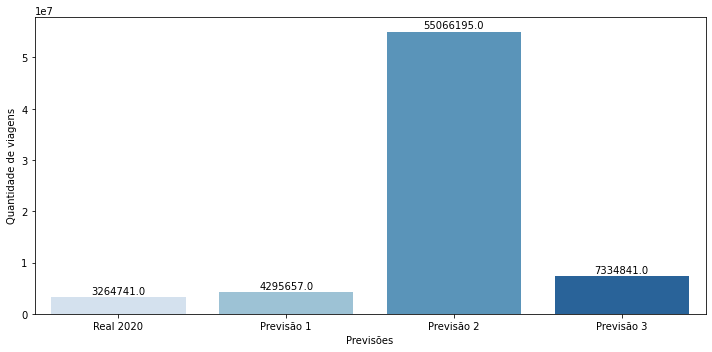

In [ ]:
#Criando uma figure, axes
fig, ax = plt.subplots(figsize=(10,5))

#Criando o gráfico de barras 
ax = sns.barplot(x=total['index'], y=total[0], ax=ax, data=total, palette="Blues")

#Criando o layout
ax.set_xlabel('Previsões')
ax.set_ylabel('Quantidade de viagens')

#Criando os rótulos dos dados
for i in ax.patches:
    h = i.get_height()
    ax.annotate('{}'.format(h), xy = (i.get_x()+i.get_width()/2, h), xytext = (0,3), textcoords = 'offset points', ha = 'center')

#Otimizando espaço da figure
fig.tight_layout();

In [ ]:
#Dif real 2020 e previsão 1
round(((4295657 - 3264741) / 3264741) *100)

32

In [ ]:
#Dif real 2020 e previsão 2
round(((55066195 - 3264741) / 3264741) *100)

1587

In [ ]:
#Dif real 2020 e previsão 3
round(((7334841 - 3264741) / 3264741) *100)

125